# Segunda avaliação de TESI
João Carlos B. Santos  
Matheus Barros

# Informações sobre o dataset
#### Título: [Haberman's Survival Data (Dados de Sobrevivência de Haberman)](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)
#### Fontes:
(a) Doador: Tjen-Sien Lim (limt@stat.wisc.edu)  
(b) Data: 4 de março de 1999

#### Uso passado:
1. Haberman, S. J. (1976). Residuais Generalizados para Modelos Log-Lineares, Anais da 9ª Conferência Internacional de Biometria, Boston, pp. 104-122.
2. Landwehr, J. M., Pregibon, D., e Shoemaker, A. C. (1984), Modelos Gráficos para Avaliação de Modelos de Regressão Logística com discussão), Jornal da Associação Estatística Americana 79: 61-83.
3. Lo, W.-D. (1993). Árvores de Regressão Logística, tese de doutorado, Departamento de Estatística, Universidade de Wisconsin, Madison, WI.

#### Informação Relevante:
O conjunto de dados contém casos de um estudo realizado entre **1958** e **1970**, no Hospital Billings, da Universidade de Chicago, sobre a sobrevida de pacientes submetidos à cirurgia para câncer de mama.

#### Número de Instâncias: 306
#### Número de Atributos: 4 (incluindo o atributo de classe)
#### Informações sobre Atributos:
1. Idade do paciente no momento da cirurgia;
2. Ano da cirurgia do paciente (ano - 1900);
3. Número de nódulos axilares positivos detectados;
4. Status de Sobrevivência (atributo de classe);  
    1 = o paciente sobreviveu 5 anos ou mais;  
    2 = o paciente morreu dentro de 5 anos.

#### Atributos ausentes: Nenhum

## Todos os imports necessários

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from scipy.stats import bayes_mvs, norm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC

### Carregando o csv com os dados e exibindo as 5 primeiras linhas

In [295]:
# df = Data frame
df = pd.read_csv('haberman_csv.csv')
df.head(5)

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Exibindo as 5 últimas linhas

In [296]:
df.tail(5)

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


### Exibindo as informações sobre o dataframe com info() e describe()

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [298]:
df.describe()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Exibindo alguns dados referentes a idade dos pacientes (idade menor, maior, média)

In [299]:
# Exibindo a idade dos pacientes na data da cirurgia
df['Age_of_patient_at_time_of_operation']

0      30
1      30
2      30
3      31
4      31
5      33
6      33
7      34
8      34
9      34
10     34
11     34
12     34
13     34
14     35
15     35
16     36
17     36
18     37
19     37
20     37
21     37
22     37
23     37
24     38
25     38
26     38
27     38
28     38
29     38
       ..
276    67
277    67
278    67
279    68
280    68
281    69
282    69
283    69
284    69
285    70
286    70
287    70
288    70
289    70
290    70
291    70
292    71
293    72
294    72
295    72
296    72
297    73
298    73
299    74
300    74
301    75
302    76
303    77
304    78
305    83
Name: Age_of_patient_at_time_of_operation, Length: 306, dtype: int64

In [300]:
# Exibindo todos os valores únicos para a idade dos pacientes
df['Age_of_patient_at_time_of_operation'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [301]:
# Exibindo a menor idade
df['Age_of_patient_at_time_of_operation'].min()

30

In [302]:
# Exibindo a maior idade
df['Age_of_patient_at_time_of_operation'].max()

83

In [303]:
# Exibindo a media das idades
df['Age_of_patient_at_time_of_operation'].mean()

52.45751633986928

In [304]:
# Exibindo idades nulas
df[df['Age_of_patient_at_time_of_operation'].isnull()]

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status


### Exibindo todas as colunas e buscando valores nulos

#### Exibindo todas as colunas existentes

In [305]:
df.columns

Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

#### Procurando por dados nulos nas colunas

In [306]:
df.isnull().sum()

Age_of_patient_at_time_of_operation           0
Patients_year_of_operation                    0
Number_of_positive_axillary_nodes_detected    0
Survival_status                               0
dtype: int64

## Procurando valores inconsistentes (Outiliers)

### Idade dos pacientes

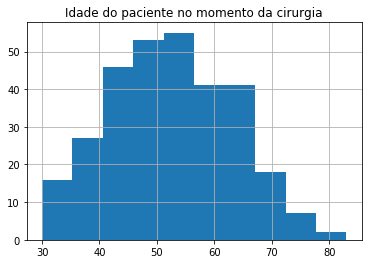

In [307]:
# Histograma das idades dos pacientes
df['Age_of_patient_at_time_of_operation'].hist()
plt.title('Idade do paciente no momento da cirurgia')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54a97bd128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54a97bd7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54a9783f98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54a97bde48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54a97821d0>],
 'means': []}

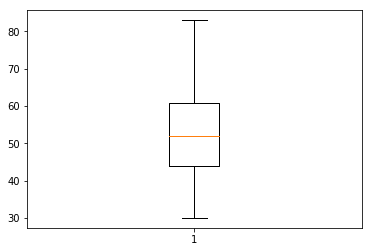

In [308]:
# Média das idades
plt.boxplot(df['Age_of_patient_at_time_of_operation'], showfliers=True)

### Ano da cirurgia (tem que está entre 58 e 70)

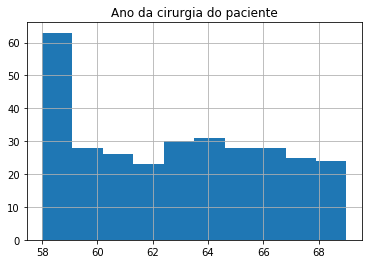

In [309]:
# Histograma dos anos em que foram realizadas as cirgurgias
df['Patients_year_of_operation'].hist()
plt.title('Ano da cirurgia do paciente')
plt.show()

In [310]:
# Ano da Primeira cirurgia
print("Ano da primeira cirurgia: ", df['Patients_year_of_operation'].min())
print("Ano da última cirurgia: ", df['Patients_year_of_operation'].max())

Ano da primeira cirurgia:  58
Ano da última cirurgia:  69


{'whiskers': [<matplotlib.lines.Line2D at 0x7f54a972b8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54a972bf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54a972b780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54a972e630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54a972e978>],
 'means': []}

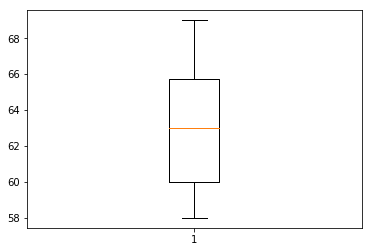

In [311]:
# 
plt.boxplot(df['Patients_year_of_operation'], showfliers=True)

### Número de nódulos axiliais

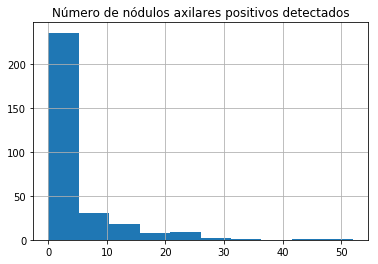

In [312]:
# Histograma dos nódulos axiliais
df['Number_of_positive_axillary_nodes_detected'].hist()
plt.title('Número de nódulos axilares positivos detectados')
plt.show()

In [313]:
print("Valor mínimo: ", df['Number_of_positive_axillary_nodes_detected'].min())
print("Valor máximo: ", df['Number_of_positive_axillary_nodes_detected'].max())

Valor mínimo:  0
Valor máximo:  52


{'whiskers': [<matplotlib.lines.Line2D at 0x7f54a9687550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54a9687be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54a9687400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54a968d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54a968d5f8>],
 'means': []}

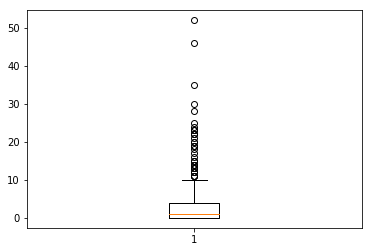

In [314]:
plt.boxplot(df['Number_of_positive_axillary_nodes_detected'], showfliers=True)

### Estatus de sobrevivencia

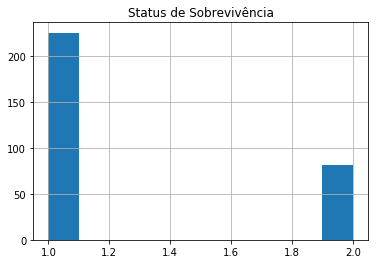

In [315]:
df['Survival_status'].hist()
plt.title('Status de Sobrevivência')
plt.show()

In [316]:
print("Valor mínimo: ", df['Survival_status'].min())
print("Valor máximo: ", df['Survival_status'].max())

Valor mínimo:  1
Valor máximo:  2


{'whiskers': [<matplotlib.lines.Line2D at 0x7f54a96671d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54a9667860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54a9667080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54a9667ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54a966d278>],
 'means': []}

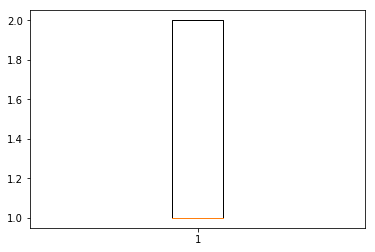

In [317]:
plt.boxplot(df['Survival_status'], showfliers=True)

**Não foi encontrado nenhum valor nulo ou inconsistente.**

## Excluíndo colunas
_Foi excluída a coluna **'Ano da cirurgia'** porque o procedimento utilizado nos pacientes foi o mesmo durante o experimento_

In [318]:
df_temp = df # Criando uma cópia
df_extra1 = df_temp.drop(df_temp.columns[[1]], axis=1)
df_extra1

,Age_of_patient_at_time_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,1,1
1,30,3,1
2,30,0,1
3,31,2,1
4,31,4,1
5,33,10,1
6,33,0,1
7,34,0,2
8,34,9,2
9,34,30,1


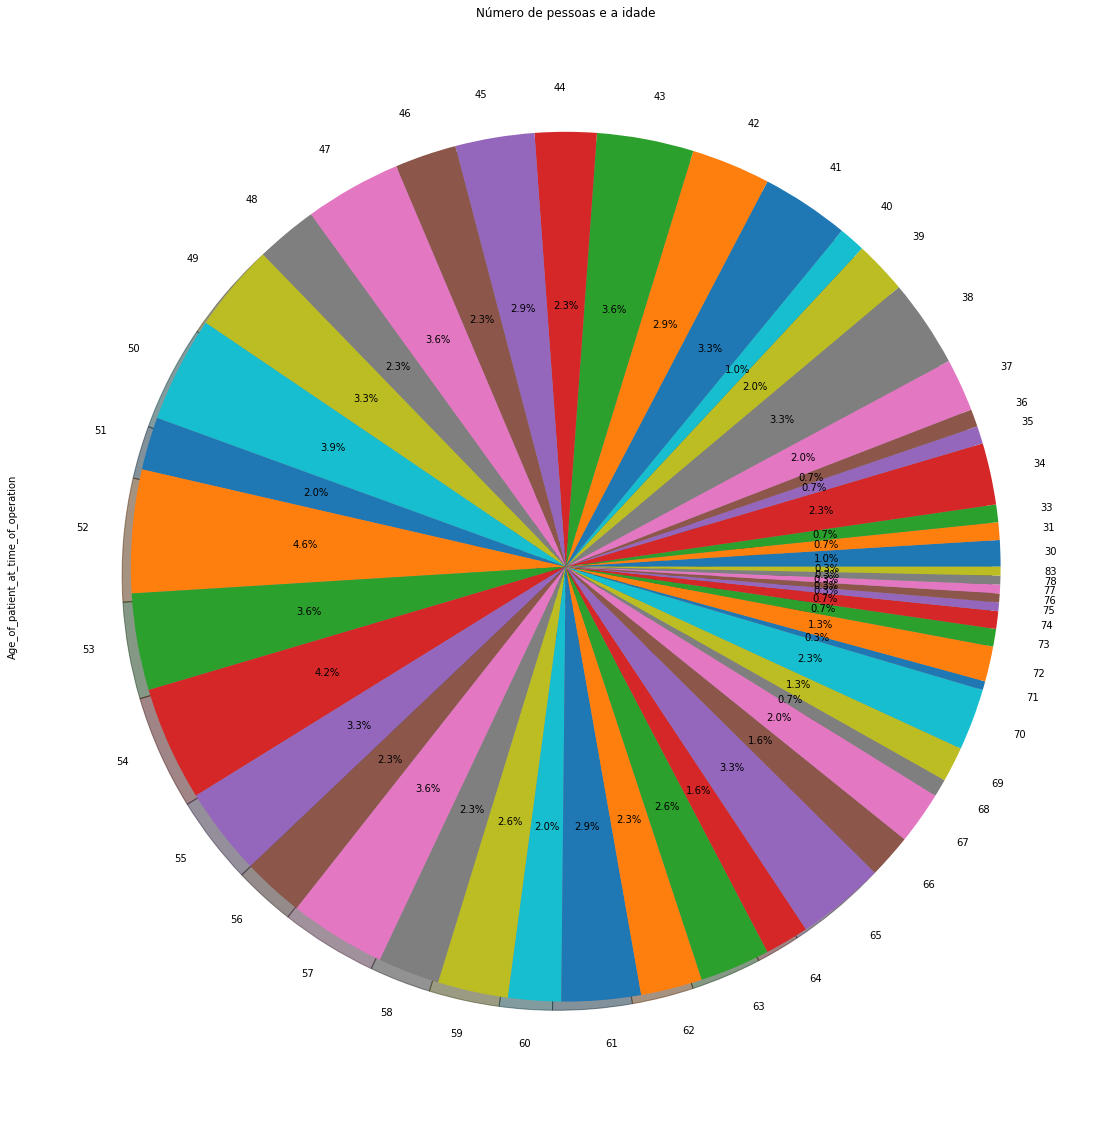

In [319]:
df_extra1['Age_of_patient_at_time_of_operation'].value_counts(sort=False).plot.pie(autopct='%1.1f%%', shadow=True, figsize=(20, 20))
plt.title('Número de pessoas e a idade')
plt.show()

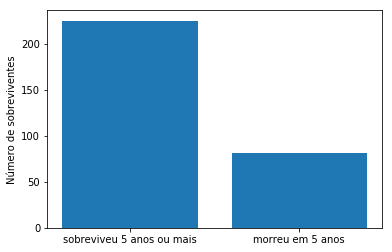

In [320]:
status_sobre = ['sobreviveu 5 anos ou mais', 'morreu em 5 anos']
dados_status = df['Survival_status'].value_counts(sort=False)
# Gŕafico de barras
plt.bar(status_sobre, dados_status)
plt.ylabel('Número de sobreviventes')
plt.show()


## Matriz de correlação (Com a coluna "Ano da cirurgia")

                                            Age_of_patient_at_time_of_operation  \
Age_of_patient_at_time_of_operation                                    1.000000   
Patients_year_of_operation                                             0.089529   
Number_of_positive_axillary_nodes_detected                            -0.063176   
Survival_status                                                        0.067950   

                                            Patients_year_of_operation  \
Age_of_patient_at_time_of_operation                           0.089529   
Patients_year_of_operation                                    1.000000   
Number_of_positive_axillary_nodes_detected                   -0.003764   
Survival_status                                              -0.004768   

                                            Number_of_positive_axillary_nodes_detected  \
Age_of_patient_at_time_of_operation                                          -0.063176   
Patients_year_of_operation       

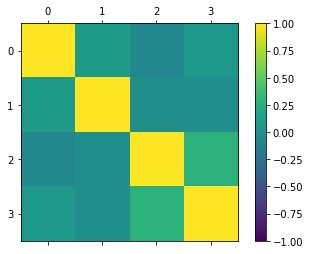

In [321]:
correlacao = df.corr()
print(correlacao)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Matriz de correlação ('Sem a coluna "Ano da cirurgia")

                                            Age_of_patient_at_time_of_operation  \
Age_of_patient_at_time_of_operation                                    1.000000   
Number_of_positive_axillary_nodes_detected                            -0.063176   
Survival_status                                                        0.067950   

                                            Number_of_positive_axillary_nodes_detected  \
Age_of_patient_at_time_of_operation                                          -0.063176   
Number_of_positive_axillary_nodes_detected                                    1.000000   
Survival_status                                                               0.286768   

                                            Survival_status  
Age_of_patient_at_time_of_operation                0.067950  
Number_of_positive_axillary_nodes_detected         0.286768  
Survival_status                                    1.000000  


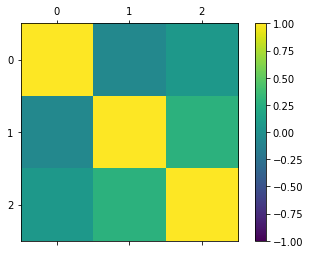

In [322]:
correlacao = df_extra1.corr()
print(correlacao)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

### Treinando os dados e avaliando os resultados

In [323]:
# Criando as variáveis x e y para treinamento
# FIXME: Perguntas para avaliarmos os dados:
# O paciente tinha quantos anos na época da cirurgia?
# O paciente que possuia nódulos axililares na época da cirurgia, sobreviveu mais de 5 anos?
# 
x = df[['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected']]
y = df["Survival_status"]

x = pd.get_dummies(x)

# Treinando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

# Verificando o tamanho dos dados
print('X:', len(x))
print('Y:', len(y))

# --------------------------------- #
# TODO: Avaliar se vale a pena usar sem a coluna 'Ano da cirurgia'
x_extra = df_extra1[['Age_of_patient_at_time_of_operation', 'Number_of_positive_axillary_nodes_detected']]
y_extra = df_extra1['Survival_status']
x_extra = pd.get_dummies(x_extra)

# Treinando os dados
x_extra_treino, x_extra_teste, y_extra_treino, y_extra_teste = train_test_split(x_extra, y_extra, test_size=0.25, random_state=0)
# print('X_extra: ', len(x_extra))
# print('Y_extra: ', len(y_extra))

X: 306
Y: 306


## Algoritmos de classificação

### Naive bayes Multinomial

In [324]:
modelo_mnb = MultinomialNB()

### AdaBoost

In [325]:
modelo_ada = AdaBoostClassifier()

### OneVsOne

In [326]:
modelo_ovo = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=-1))

### OneVsRest

In [327]:
modelo_ovr = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=-1))

### GradientBoostingClassifier
É um algoritmo de árvore de decisão. O [GBC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) é o algoritmo que suporte classificação binária e multi-classe.


In [328]:
modelo_gbc = GradientBoostingClassifier(random_state=0)

### Implementando validação cruzada (K-folding)

In [329]:
# Variável k
k = 20

#### Naive Bayes Multinomial k-folding

In [330]:
scores_mnb = cross_val_score(modelo_mnb, x, y, cv=k)
# print('Score MNB: ', scores)
# TODO: Terminar esses testes
tx_acerto_mnb, variancia_mnb, desvio_mnb = bayes_mvs(scores_mnb, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_mnb[0] * 100))
print("Variância: ", variancia_mnb[0])
print("desvio:", desvio_mnb[0])

# com os dados de treino extra
print()
scores_mnbx = cross_val_score(modelo_mnb, x_extra, y_extra, cv=k)
tx_acerto_mnbx, variancia_mnbx, desvio_mnbx = bayes_mvs(scores_mnbx, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_mnbx[0] * 100))
print("Variância: ", variancia_mnbx[0])
print("desvio:", desvio_mnbx[0])

Taxa de acerto: 73.96%
Variância:  0.011053765202015065
desvio: 0.1036029453334937

Taxa de acerto: 73.02%
Variância:  0.011735795904290207
desvio: 0.10675132116101624


#### AdaBoost

In [331]:
scores_ada = cross_val_score(modelo_ada, x, y, cv = k) 
tx_acerto_ada, variancia_ada, desvio_ada = bayes_mvs(scores_ada, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ada[0] * 100))
print("Variância: ", variancia_ada[0])
print("desvio:", desvio_ada[0])

# Extra
scores_adax = cross_val_score(modelo_ada, x_extra, y_extra, cv = k) 
tx_acerto_adax, variancia_adax, desvio_adax = bayes_mvs(scores_adax, 0.95)
print()
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_adax[0] * 100))
print("Variância: ", variancia_adax[0])
print("desvio:", desvio_adax[0])

Taxa de acerto: 68.09%
Variância:  0.027009619285286196
desvio: 0.1619482337440972

Taxa de acerto: 70.39%
Variância:  0.024065559308354256
desvio: 0.1528674300019148


#### OneVsRest

In [332]:
modelo_ovr = modelo_ovr.fit(x, y)
scores_ovr = cross_val_score(modelo_ovr, x, y, cv=k)
tx_acerto_ovr, variancia_ovr, desvio_ovr = bayes_mvs(scores_ovr, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ovr[0] * 100))
print("Variância: ", variancia_ovr[0])
print("desvio:", desvio_ovr[0])

# Dados de treino extra
modelo_ovrx = modelo_ovr
scores_ovrx = cross_val_score(modelo_ovrx, x_extra, y_extra, cv=k)
tx_acerto_ovrx, variancia_ovrx, desvio_ovrx = bayes_mvs(scores_ovrx, 0.95)
print()
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ovrx[0] * 100))
print("Variância: ", variancia_ovrx[0])
print("desvio:", desvio_ovrx[0])


/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarni

Taxa de acerto: 73.53%
Variância:  0.00010516317253545017
desvio: 0.010105290996559902

Taxa de acerto: 73.53%
Variância:  0.00010516317253545017
desvio: 0.010105290996559902


/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarni

#### OneVsOne

In [333]:
modelo_ovo = modelo_ovo.fit(x, y)
scores_ovo = cross_val_score(modelo_ovo, x, y, cv=k)
tx_acerto_ovo, variancia_ovo, desvio_ovo = bayes_mvs(scores_ovo, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ovo[0] * 100))
print("Variância: ", variancia_ovo[0])
print("desvio:", desvio_ovo[0])

# Dados de treino extra
modelo_ovox = modelo_ovo
scores_ovox = cross_val_score(modelo_ovox, x_extra, y_extra, cv=k)
tx_acerto_ovox, variancia_ovox, desvio_ovox = bayes_mvs(scores_ovox, 0.95)
print()
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ovox[0] * 100))
print("Variância: ", variancia_ovox[0])
print("desvio:", desvio_ovox[0])

/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarni

Taxa de acerto: 73.53%
Variância:  0.00010516317253545017
desvio: 0.010105290996559902

Taxa de acerto: 73.53%
Variância:  0.00010516317253545017
desvio: 0.010105290996559902


/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/joaocarlos/.virtualenvs/ifpi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarni

#### GradientBoostingClassifier

In [334]:
modelo_gbc = modelo_gbc.fit(x, y)
scores_gbc = cross_val_score(modelo_gbc, x, y, cv=k)
tx_acerto_gbc, variancia_gbc, desvio_gbc = bayes_mvs(scores_gbc, 0.95)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_gbc[0] * 100))
print("Variância: ", variancia_gbc[0])
print("desvio:", desvio_gbc[0])

# Dados extras
modelo_gbcx = modelo_gbc
scores_gbcx = cross_val_score(modelo_gbcx, x_extra, y_extra, cv=k)
tx_acerto_gbcx, variancia_gbcx, desvio_gbcx = bayes_mvs(scores_gbcx, 0.95)

print()
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_gbcx[0] * 100))
print("Variância: ", variancia_gbcx[0])
print("desvio:", desvio_gbcx[0])

Taxa de acerto: 63.88%
Variância:  0.026692494367268248
desvio: 0.16099469452986306

Taxa de acerto: 61.24%
Variância:  0.04767082301490376
desvio: 0.2151509705129062
